In [61]:
### read in data
library(ggplot2)

house.data <- read.csv("NY-House-Dataset.csv", header=TRUE)
house.data.filtered <- house.data[house.data$PRICE <= 200000000, ]

View(house.data.filtered)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, NY 10022, USA",40.76125,-73.97448
2,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000,Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse,"New York, NY 10019","Central Park Tower Penthouse-217 W 57th New York St Unit PenthouseNew York, NY 10019",United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.76639,-73.98099
3,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.54181,-74.19611
4,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.76140,-73.97461
5,Brokered by Sotheby's International Realty - East Side Manhattan Brokerage,Townhouse for sale,55000000,7,2.373861,14175.000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.76722,-73.96986
6,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.67436,-73.95872
7,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.208,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.80945,-73.94678
8,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.59500,-74.10642
9,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 10473, USA",40.82159,-73.87409


In [62]:
#### Exploratory Analysis ####

price <- house.data.filtered$PRICE

## NA values
na.indices <- is.na(price) 

## drop NAs
price.compl <- price[!na.indices]

## convert to data frame and add cols
beds <- house.data.filtered$BEDS
sqft <- house.data.filtered$PROPERTYSQFT
bath <- house.data.filtered$BATH

price.compl <- data.frame(beds = beds[!na.indices], price = price[!na.indices], sqft = sqft[!na.indices], bath = bath[!na.indices])
price.compl

# remove rows with NA in predictors
na.pred <- is.na(price.compl$beds) | is.na(price.compl$sqft) | is.na(price.compl$bath)
price.compl <- price.compl[!na.pred, ]

# remove non-positive values
pos <- price.compl$price > 0 & price.compl$sqft > 0
price.compl <- price.compl[pos, ]


beds,price,sqft,bath
<int>,<int>,<dbl>,<dbl>
2,315000,1400.000,2.000000
7,195000000,17545.000,10.000000
4,260000,2015.000,2.000000
3,69000,445.000,1.000000
7,55000000,14175.000,2.373861
5,690000,4004.000,2.000000
2,899500,2184.208,2.000000
8,16800000,33000.000,16.000000
1,265000,750.000,1.000000



Call:
lm(formula = price ~ sqft, data = price.compl)

Residuals:
      Min        1Q    Median        3Q       Max 
-41036997  -1161417   -568469    -94298 180088547 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 62893.53   88248.25   0.713    0.476    
sqft          846.31      27.36  30.930   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4501000 on 4798 degrees of freedom
Multiple R-squared:  0.1662,	Adjusted R-squared:  0.1661 
F-statistic: 956.7 on 1 and 4798 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


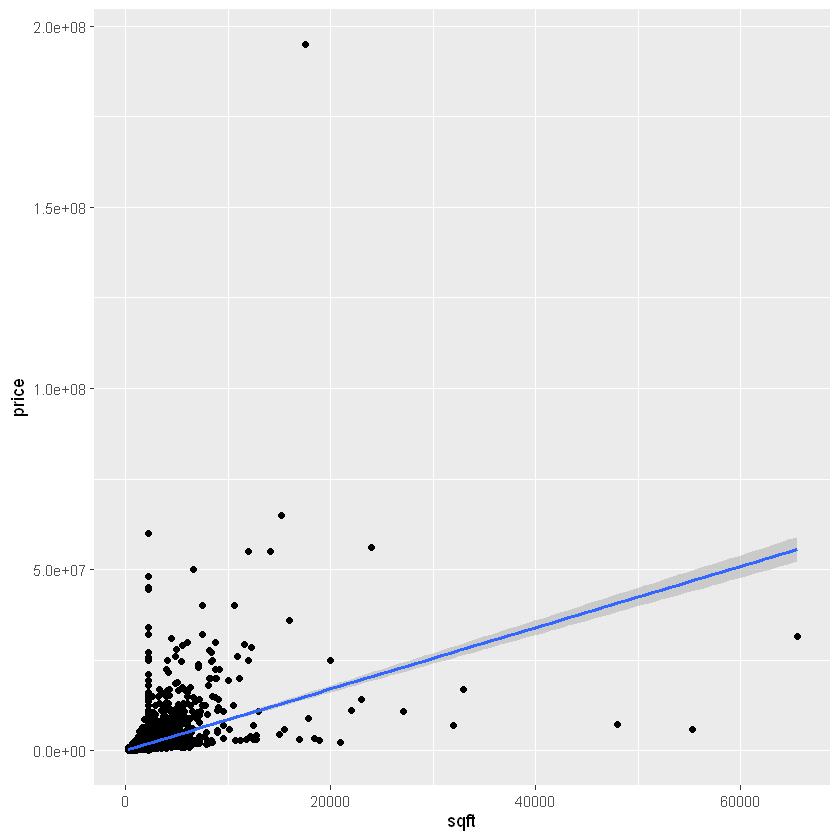

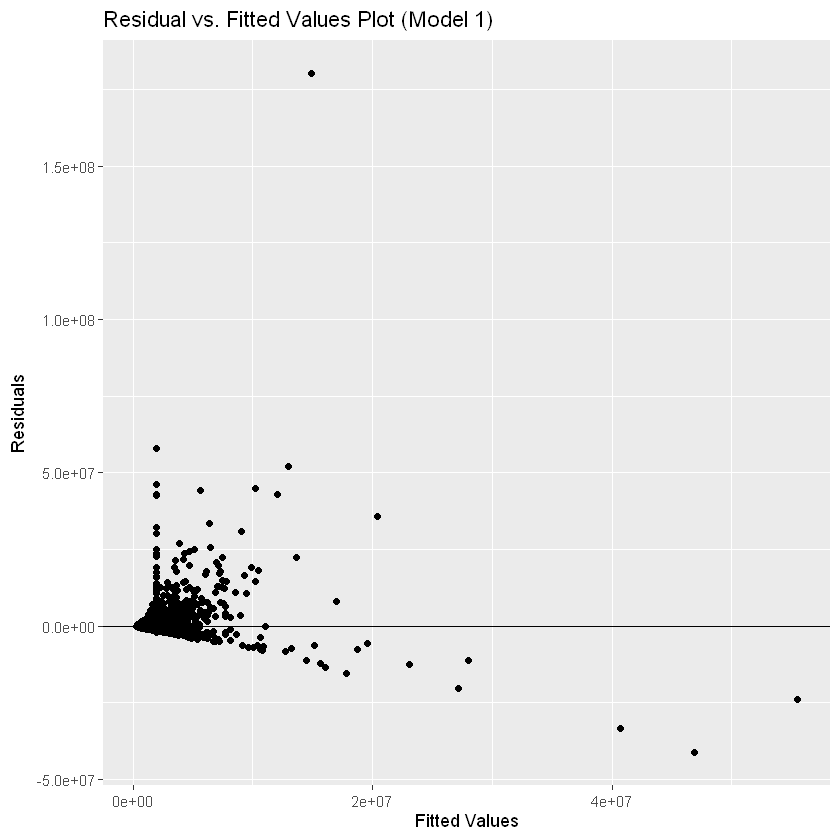

In [63]:
# # Model 1 (SQFT) vs PRICE - NON-Transformed
lin.mod1 <- lm(price ~ sqft, data = price.compl)
summary(lin.mod1)

ggplot(price.compl, aes(x = sqft, y = price)) +
  geom_point() +
  stat_smooth(method = "lm")

ggplot(lin.mod1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(title = 'Residual vs. Fitted Values Plot (Model 1)', x = 'Fitted Values', y = 'Residuals')


Call:
lm(formula = log_price ~ log_sqft, data = price.compl)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1267 -0.4783 -0.0621  0.4545  3.9615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.18548    0.15187   40.73   <2e-16 ***
log_sqft     1.00961    0.02022   49.92   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8306 on 4798 degrees of freedom
Multiple R-squared:  0.3418,	Adjusted R-squared:  0.3417 
F-statistic:  2492 on 1 and 4798 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


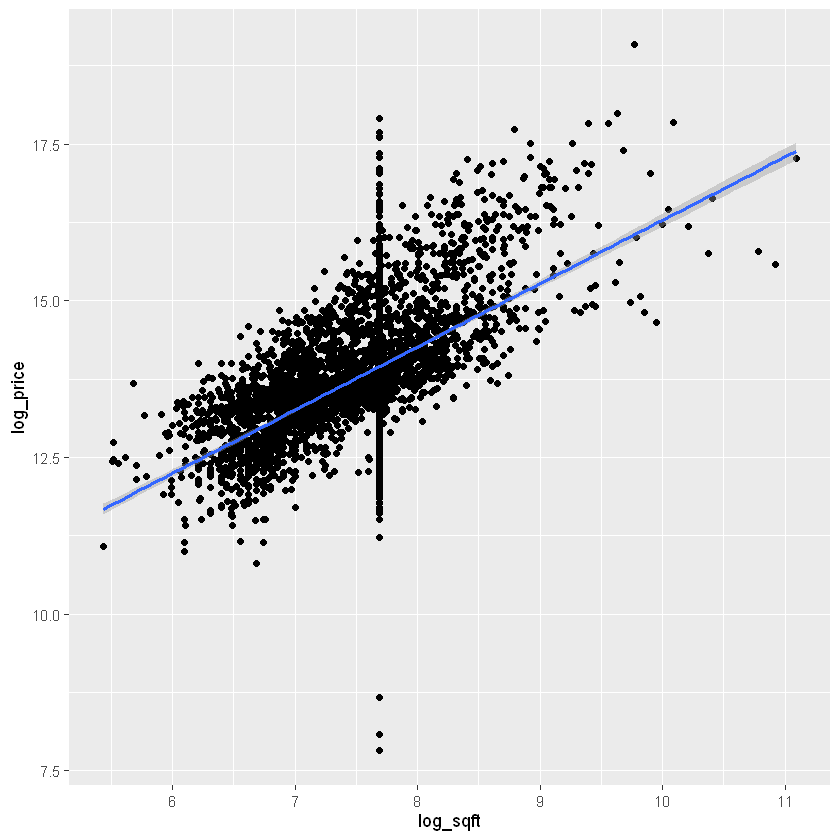

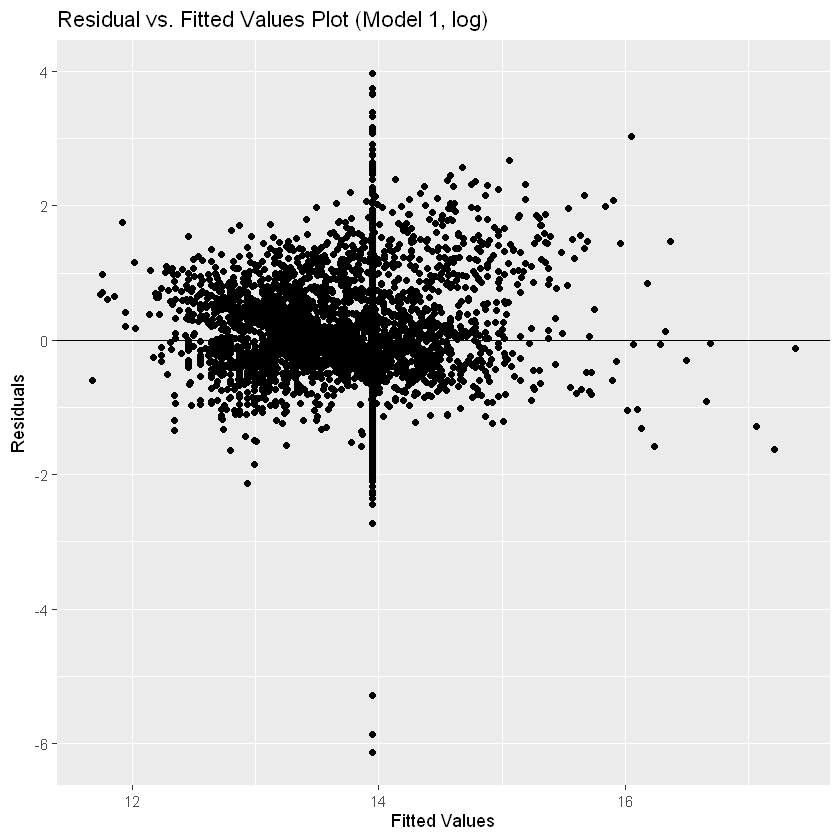

In [64]:
# Model 1 SQFT vs PRICE (log version)
price.compl$log_price <- log(price.compl$price)
price.compl$log_sqft  <- log(price.compl$sqft)

lin.mod1.log <- lm(log_price ~ log_sqft, data = price.compl)
summary(lin.mod1.log)

ggplot(price.compl, aes(x = log_sqft, y = log_price)) +
  geom_point() +
  stat_smooth(method = "lm")

ggplot(lin.mod1.log, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(title = 'Residual vs. Fitted Values Plot (Model 1, log)', 
       x = 'Fitted Values', y = 'Residuals')


Call:
lm(formula = price ~ sqft + beds + bath, data = price.compl)

Residuals:
      Min        1Q    Median        3Q       Max 
-32634151  -1005552   -462329     72814 177706233 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -346115.32  108031.55  -3.204  0.00136 ** 
sqft            685.85      30.65  22.378  < 2e-16 ***
beds        -337068.73   38847.76  -8.677  < 2e-16 ***
bath         796615.27   53834.38  14.798  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4399000 on 4796 degrees of freedom
Multiple R-squared:  0.204,	Adjusted R-squared:  0.2035 
F-statistic: 409.6 on 3 and 4796 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


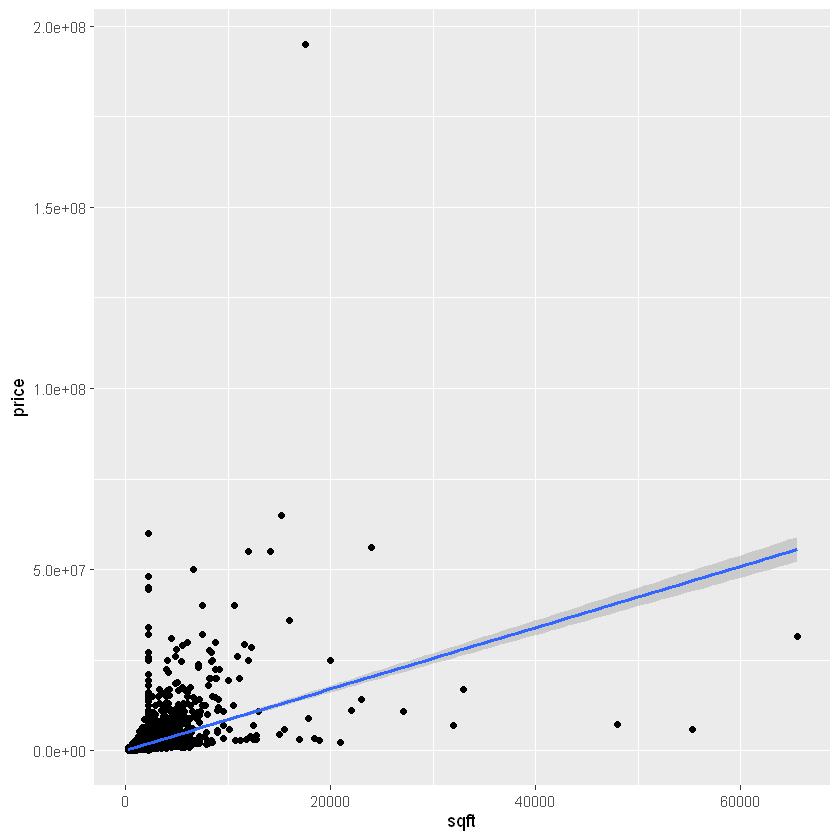

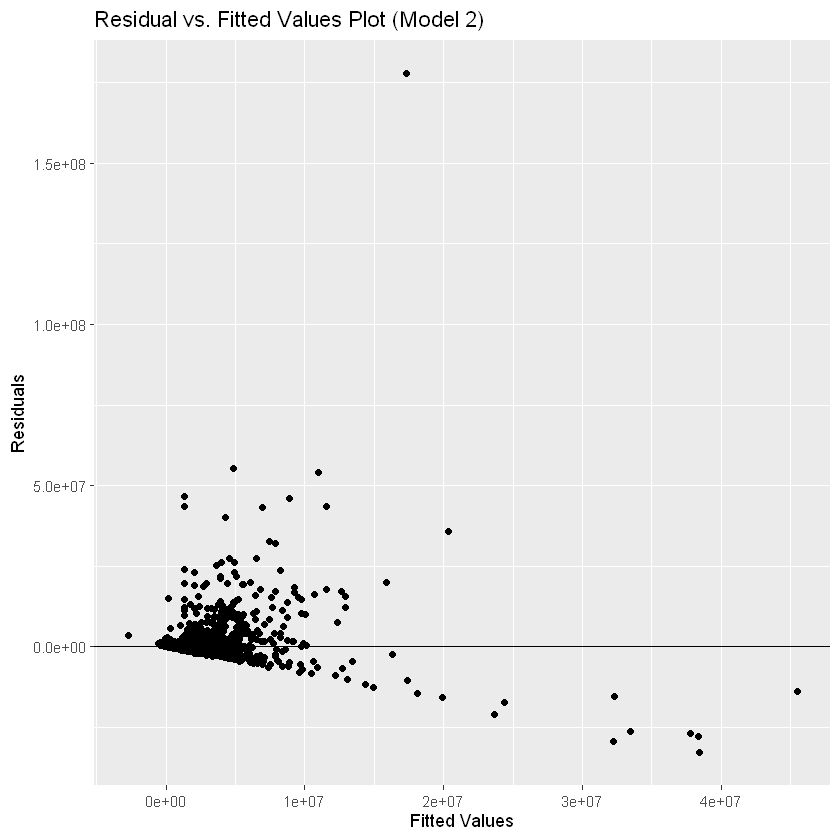

In [65]:
# # Model 2: Price vs (SQFT, BEDS, and BATH)
lin.mod2 <- lm(price ~ sqft + beds + bath, data = price.compl)
summary(lin.mod2)

# best predictor variable- sqft based on summary 
ggplot(price.compl, aes(x = sqft, y = price)) +
  geom_point() +
  stat_smooth(method = "lm")


ggplot(lin.mod2, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(title = 'Residual vs. Fitted Values Plot (Model 2)', x = 'Fitted Values', y = 'Residuals')


Call:
lm(formula = log_price ~ log_sqft + beds + bath, data = price.compl)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8960 -0.4506 -0.0615  0.4108  3.8707 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.787303   0.164593  47.313  < 2e-16 ***
log_sqft     0.752600   0.023217  32.416  < 2e-16 ***
beds        -0.048792   0.007024  -6.947 4.23e-12 ***
bath         0.204707   0.009598  21.327  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7855 on 4796 degrees of freedom
Multiple R-squared:  0.4116,	Adjusted R-squared:  0.4112 
F-statistic:  1118 on 3 and 4796 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


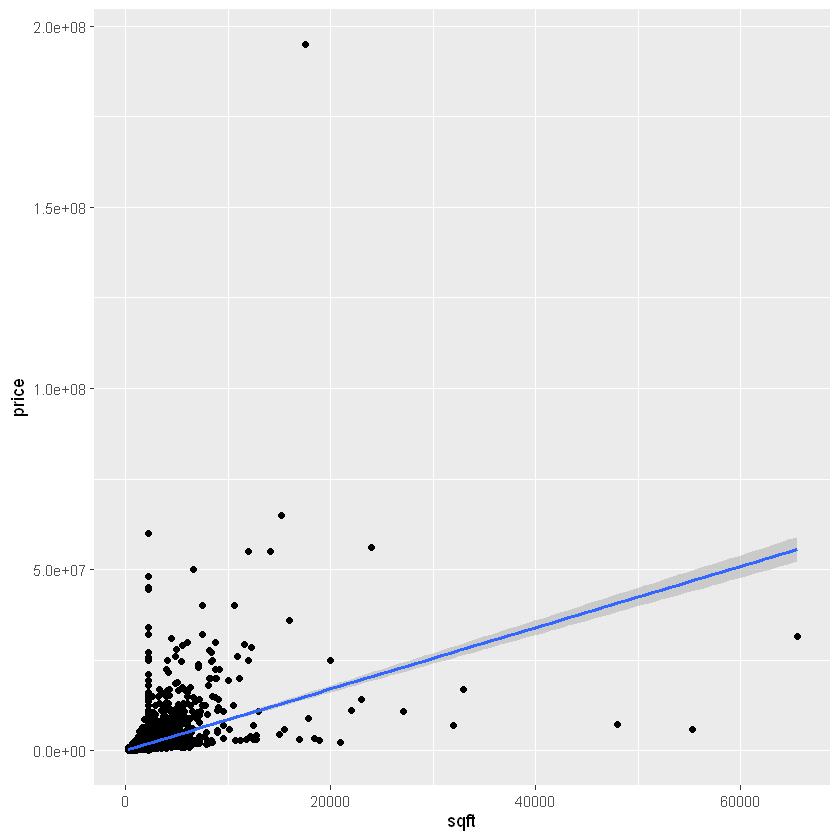

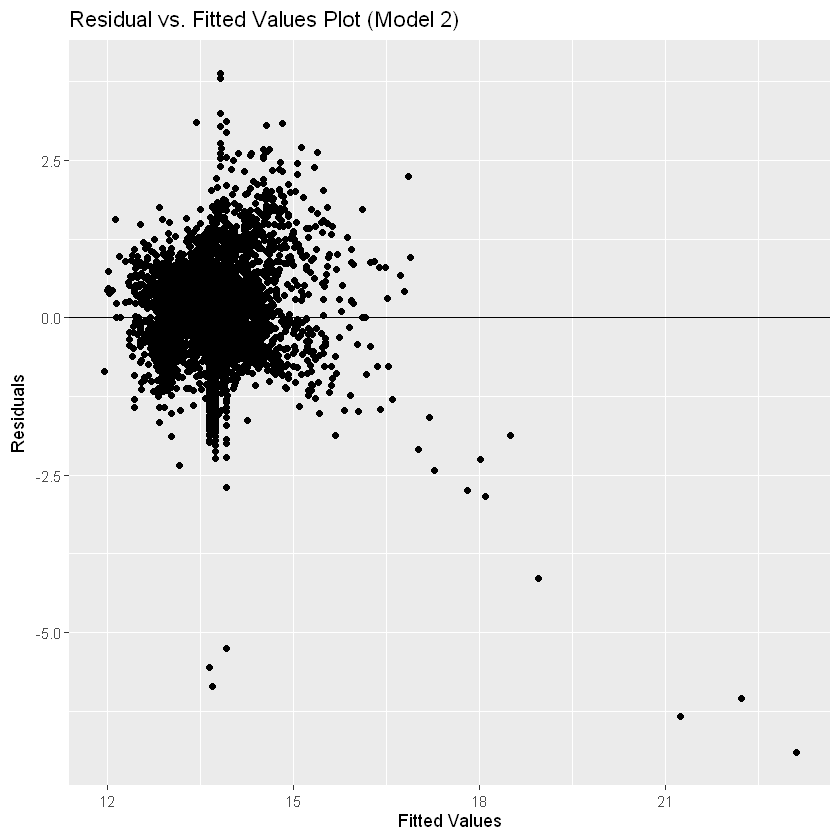

In [66]:
# # Model 2: Price vs (SQFT, BEDS, and BATH) LOG version- best model - has highest r-squared
lin.mod2 <- lm(log_price  ~ log_sqft + beds + bath, data = price.compl) # bed and bath too small to log 
summary(lin.mod2)

# best predictor variable- sqft
ggplot(price.compl, aes(x = sqft, y = price)) +
  geom_point() +
  stat_smooth(method = "lm")


ggplot(lin.mod2, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(title = 'Residual vs. Fitted Values Plot (Model 2)', x = 'Fitted Values', y = 'Residuals')


Call:
lm(formula = price ~ beds + bath, data = price.compl)

Residuals:
      Min        1Q    Median        3Q       Max 
-32417213  -1034122   -585178    -57676 185459443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   127875     111316   1.149    0.251    
beds         -266431      40686  -6.548 6.42e-11 ***
bath         1127770      54390  20.735  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4623000 on 4797 degrees of freedom
Multiple R-squared:  0.1209,	Adjusted R-squared:  0.1205 
F-statistic: 329.7 on 2 and 4797 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


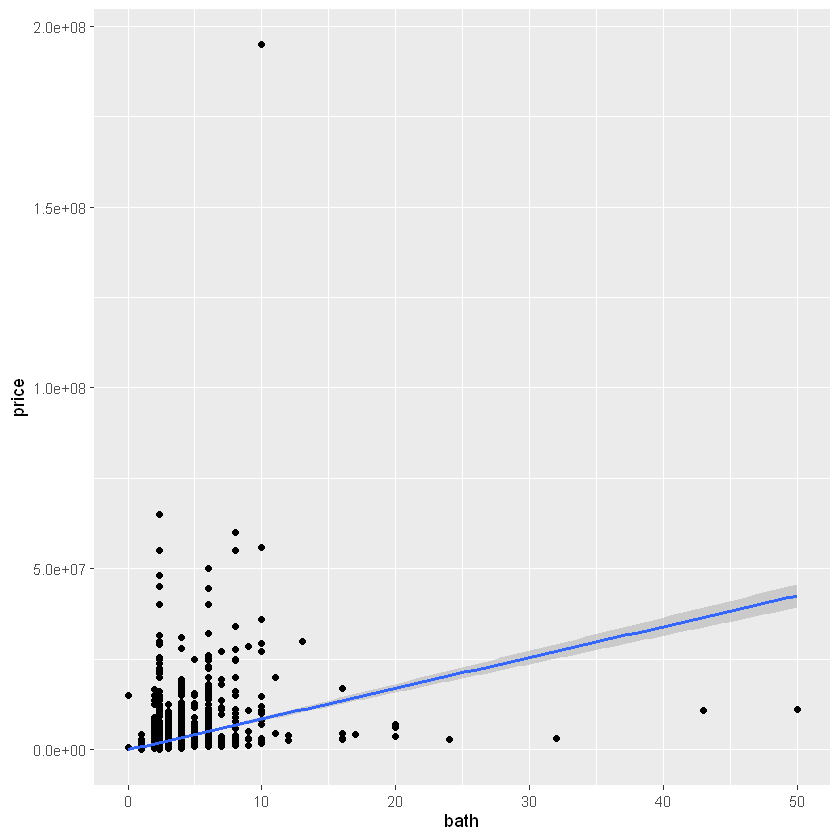

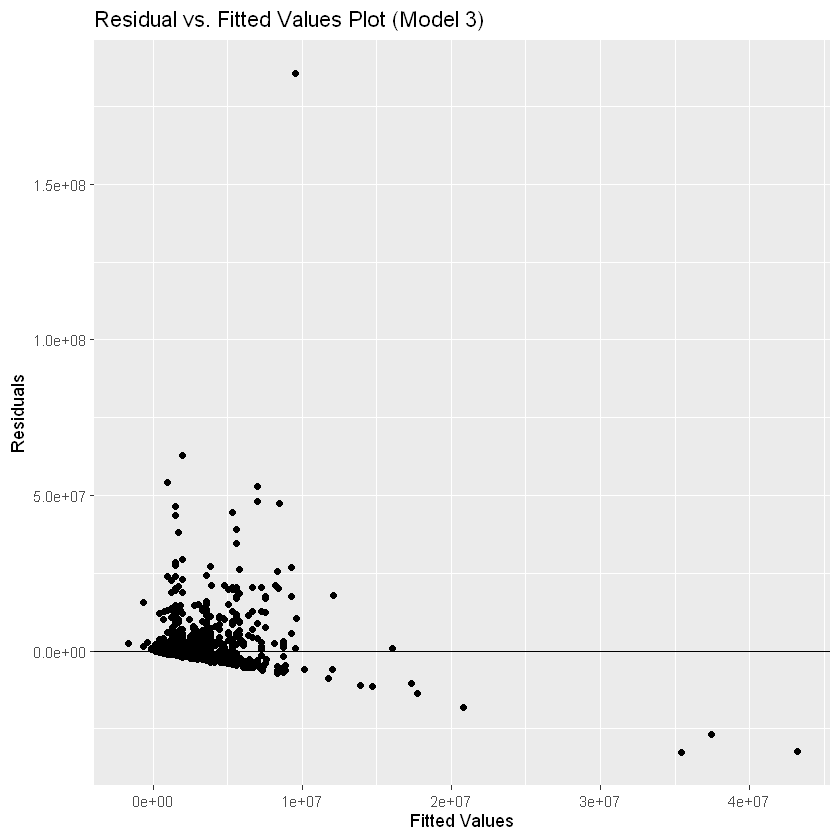

In [67]:
# # Model 3 PRICE vs (BED and BATH)
lin.mod3 <- lm(price ~ beds + bath, data = price.compl)
summary(lin.mod3)

ggplot(price.compl, aes(x = bath, y = price)) +
  geom_point() +
  stat_smooth(method = "lm")

ggplot(lin.mod3, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(title = 'Residual vs. Fitted Values Plot (Model 3)', x = 'Fitted Values', y = 'Residuals')


Call:
lm(formula = log_price ~ beds + bath, data = price.compl)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8680  -0.4992  -0.1030   0.3914   4.2435 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.087456   0.020884 626.674   <2e-16 ***
beds        -0.008736   0.007633  -1.144    0.252    
bath         0.288615   0.010204  28.284   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8673 on 4797 degrees of freedom
Multiple R-squared:  0.2827,	Adjusted R-squared:  0.2824 
F-statistic: 945.2 on 2 and 4797 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


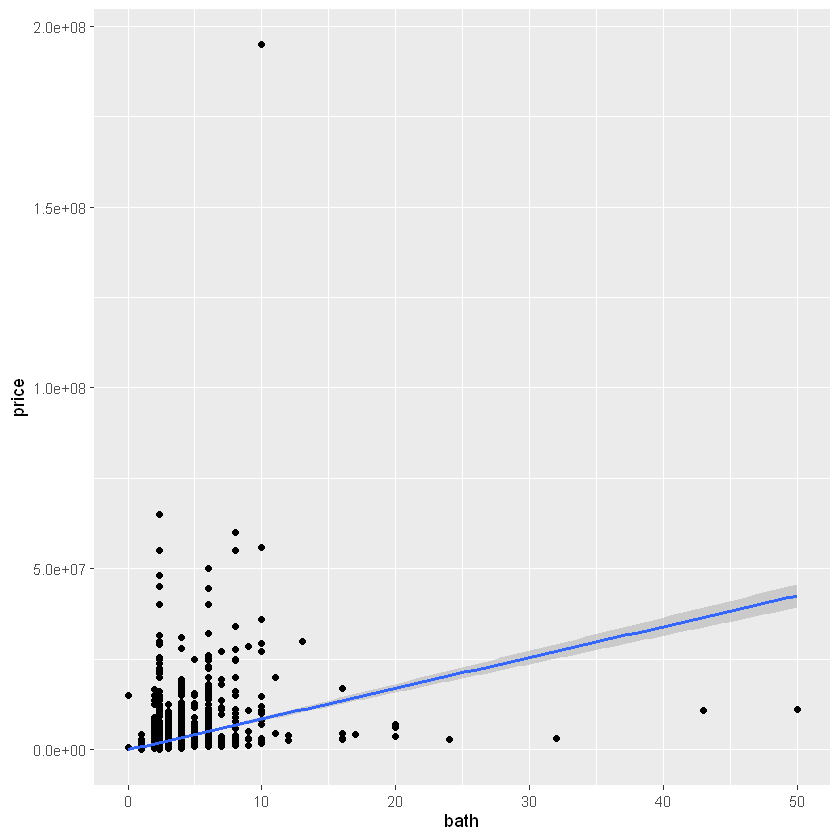

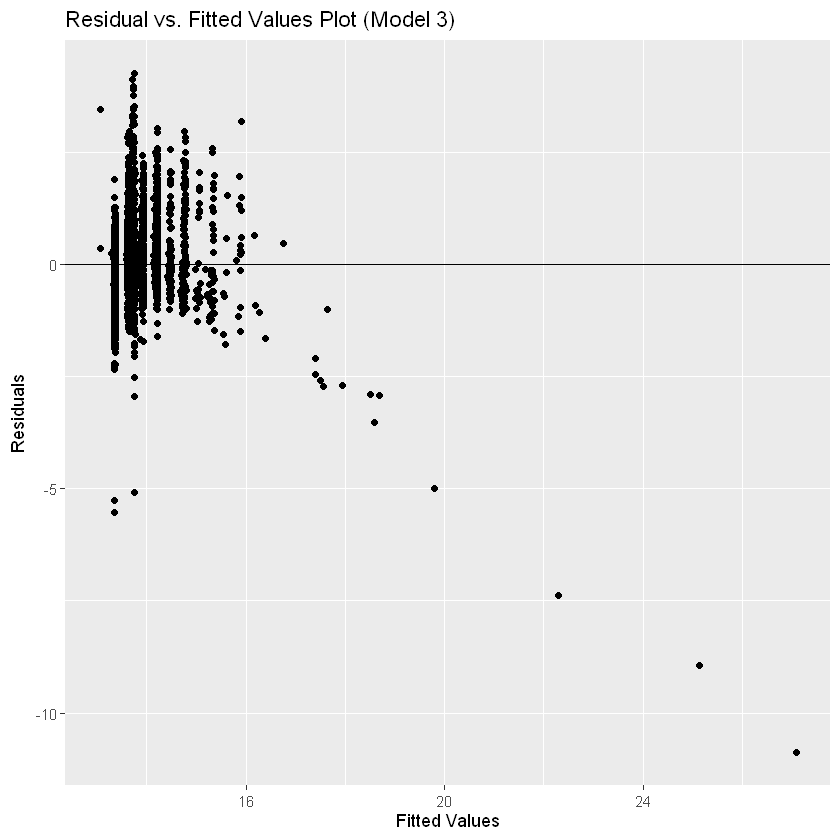

In [68]:
# # Model 3 PRICE vs (BED and BATH) LOGGED
lin.mod3 <- lm(log_price ~ beds + bath, data = price.compl)
summary(lin.mod3)

ggplot(price.compl, aes(x = bath, y = price)) +
  geom_point() +
  stat_smooth(method = "lm")

ggplot(lin.mod3, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0) +
  labs(title = 'Residual vs. Fitted Values Plot (Model 3)', x = 'Fitted Values', y = 'Residuals')